In [1]:
# import the necessary packages
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import ast
import pywt

In [2]:
# functions for image processing
#! add contrast to the image 
def contrast(img, alpha, beta):
    new_img = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
    return new_img

#! add brightness to the image
def brightness(img, alpha, beta):
    new_img = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
    return new_img

#! add gamma to the image
def gamma(img, gamma):
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img, gamma_table)

#! add blur to the image
def blur(img, ksize):
    return cv2.blur(img, (ksize, ksize))

#! add sharpen to the image
def sharpen(img, ksize):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

#! add emboss to the image
def emboss(img, ksize):
    kernel = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
    return cv2.filter2D(img, -1, kernel)

#! add edge detection to the image
def edge_detection(img, ksize):
    kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

In [21]:
def formatString(string):
    string = string.replace("array([", "[")
    string = string.replace("]),array([", "],[")
    string = string.replace("])", "]")
    return string


def convertToArray(string):
    listArr = ast.literal_eval(string)
    return listArr


def tupleToList(listArr):
    array = []
    for i in range(len(listArr)):
        array.append(listArr[i])
    return array

def loadFile(path):
    with open(path, 'r') as f:
        vector = f.read()
        vector = formatString(vector)
        vector = convertToArray(vector)
        vector = tupleToList(vector)
        f.close()
    return vector

        
def saveFile(path, vector):
    with open(path, 'w') as f:
        f.write(str(vector))
        f.close()

In [83]:

#! function to return a vector of frequency of all intensities from 0 to 255

def get_img_vector(img):
    img_vector = np.zeros(256)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            img_vector[img[i][j]] += 1
    return img_vector


#! function to calculate euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    try: 
        distance = 0.0
        for i in range(len(vector1)):
            distance += np.square(vector1[i] - vector2[i])
        distance = np.sqrt(distance)
        return distance
    except Exception as e:
        print("Error")
        print(e)
        # print(i,j)
        return 0

#! function to calculate manhattan distance between two vectors
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

In [139]:
# def getPrototype(test_vector, prototypes):
#     min_distance = euclidean_distance(test_vector, prototypes[0])
#     index = 0
#     for i in range(1, len(prototypes)):
#         distance = euclidean_distance(test_vector, prototypes[i])
#         if distance < min_distance:
#             min_distance = distance
#             index = i
#     return index, min_distance


def assignClass(covid_membership, normal_membership, pneumonia_membership):
    if covid_membership > normal_membership and covid_membership > pneumonia_membership:
        return "covid"

    elif normal_membership > covid_membership and normal_membership > pneumonia_membership:
        return "normal"

    elif pneumonia_membership > normal_membership and pneumonia_membership > covid_membership:
        return "pneumonia"

    elif normal_membership == covid_membership == pneumonia_membership:
        return "\nCovid, Normal, Pneumonia have same membership.Cannot assign a single class"

    elif normal_membership == covid_membership:
        return "\nNormal and Covid have same membership.Cannot assign a single class "

    elif normal_membership == pneumonia_membership:
        return "\nNormal and Pneumonia have same membership.Cannot assign a single class"
    elif covid_membership == pneumonia_membership:
        return "\nPneumonia and Covid have same membership.Cannot assign a single class"
    else:
        return "\n Some error occurred"


def accuracy(lengthTestVectors, lengthCorrectlyClassified):
    return (lengthCorrectlyClassified/lengthTestVectors)*100


def getDegreeOfMembership(distance, gamma):

    temp = gamma * distance

    if(temp > 1):
        return 0
    elif(temp == 0):
        return 1
    else:
        return 1-temp


def getMaximumMembership(test_vector, prototypes, gamma):
    maxDegree = getDegreeOfMembership(
        euclidean_distance(test_vector, prototypes[0]), gamma)
    index = 0

    for i in range(1, len(prototypes)):
        degree = getDegreeOfMembership(
            euclidean_distance(test_vector, prototypes[i]), gamma)
        if degree > maxDegree:
            maxDegree = degree
            index = i
    return index, maxDegree


In [16]:
# # read all vectors

# covid_test_vectors = loadFile('../COVID-19_Radiography_Dataset/COVID/features/covid_test_vectors.txt')
# normal_test_vectors = loadFile('../COVID-19_Radiography_Dataset/Normal/features/normal_test_vectors.txt')
# pneumonia_test_vectors = loadFile('../COVID-19_Radiography_Dataset/Viral Pneumonia/features/pneumonia_test_vectors.txt')

# covid_train_vectors = loadFile('../COVID-19_Radiography_Dataset/COVID/features/covid_train_vectors.txt')
# normal_train_vectors = loadFile('../COVID-19_Radiography_Dataset/Normal/features/normal_train_vectors.txt')
# pneumonia_train_vectors = loadFile('../COVID-19_Radiography_Dataset/Viral Pneumonia/features/pneumonia_train_vectors.txt')

# print("covid_test_vectors: ", len(covid_test_vectors))
# print("normal_test_vectors: ", len(normal_test_vectors))
# print("pneumonia_test_vectors: ", len(pneumonia_test_vectors))

# print("covid_train_vectors: ", len(covid_train_vectors))
# print("normal_train_vectors: ", len(normal_train_vectors))
# print("pneumonia_train_vectors: ", len(pneumonia_train_vectors))



covid_test_vectors:  724
normal_test_vectors:  2039
pneumonia_test_vectors:  269
covid_train_vectors:  2892
normal_train_vectors:  8153
pneumonia_train_vectors:  1076


In [20]:
# max_value = covid_test_vectors[0][0]
# for i in range(len(covid_test_vectors)):
#     for j in range(len(covid_test_vectors[i])):
#         if covid_test_vectors[i][j] > max_value:
#             max_value = covid_test_vectors[i][j]

# for i in range(len(normal_test_vectors)):
#     for j in range(len(normal_test_vectors[i])):
#         normal_test_vectors[i][j] = normal_test_vectors[i][j]/max_value

# for i in range(len(pneumonia_test_vectors)):
#     for j in range(len(pneumonia_test_vectors[i])):
#         pneumonia_test_vectors[i][j] = pneumonia_test_vectors[i][j]/max_value

# for i in range(len(covid_train_vectors)):
#     for j in range(len(covid_train_vectors[i])):
#         covid_train_vectors[i][j] = covid_train_vectors[i][j]/max_value

# for i in range(len(normal_train_vectors)):
#     for j in range(len(normal_train_vectors[i])):
#         normal_train_vectors[i][j] = normal_train_vectors[i][j]/max_value

# for i in range(len(pneumonia_train_vectors)):
#     for j in range(len(pneumonia_train_vectors[i])):
#         pneumonia_train_vectors[i][j] = pneumonia_train_vectors[i][j]/max_value


# # divide all the vectors by max value

# for i in covid_test_vectors:
#     for j in range(len(i)):
#         i[j] = i[j]/max_value

# for i in normal_test_vectors:
#     for j in range(len(i)):
#         i[j] = i[j]/max_value

# for i in pneumonia_test_vectors:
#     for j in range(len(i)):
#         i[j] = i[j]/max_value

# for i in covid_train_vectors:
#     for j in range(len(i)):
#         i[j] = i[j]/max_value

# for i in normal_train_vectors:
#     for j in range(len(i)):
#         i[j] = i[j]/max_value

# for i in pneumonia_train_vectors:
#     for j in range(len(i)):
#         i[j] = i[j]/max_value

In [24]:
# save the normalized vectors to file

# saveFile( './covid_test_vectors_normalized.txt',covid_test_vectors)
# saveFile( './normal_test_vectors_normalized.txt',normal_test_vectors)
# saveFile( './pneumonia_test_vectors_normalized.txt',pneumonia_test_vectors)

# saveFile( './covid_train_vectors_normalized.txt',covid_train_vectors)
# saveFile( './normal_train_vectors_normalized.txt',normal_train_vectors)
# saveFile( './pneumonia_train_vectors_normalized.txt',pneumonia_train_vectors)

In [65]:
# read normalized vectors

covid_test_vectors = loadFile('./covid_test_vectors_normalized.txt')
normal_test_vectors = loadFile('./normal_test_vectors_normalized.txt')
pneumonia_test_vectors = loadFile('./pneumonia_test_vectors_normalized.txt')

covid_train_vectors = loadFile('./covid_train_vectors_normalized.txt')
normal_train_vectors = loadFile('./normal_train_vectors_normalized.txt')
pneumonia_train_vectors = loadFile('./pneumonia_train_vectors_normalized.txt')

print("covid_test_vectors: ", len(covid_test_vectors))
print("normal_test_vectors: ", len(normal_test_vectors))
print("pneumonia_test_vectors: ", len(pneumonia_test_vectors))

print("covid_train_vectors: ", len(covid_train_vectors))
print("normal_train_vectors: ", len(normal_train_vectors))
print("pneumonia_train_vectors: ", len(pneumonia_train_vectors))

covid_test_vectors:  724
normal_test_vectors:  2039
pneumonia_test_vectors:  269
covid_train_vectors:  2892
normal_train_vectors:  8153
pneumonia_train_vectors:  1076


In [259]:
# clustering the vectors which lie within the distance of 1
covid_clusters = []
normal_clusters = []
pneumonia_clusters = []



In [283]:

#! normal clusters

r =0.03
cluster = []
check = []
for i in range(0, len(normal_train_vectors)-1):
    cluster = []
    if normal_train_vectors[i] not in check:
        cluster.append(normal_train_vectors[i])
        check.append(normal_train_vectors[i])
    else:
        continue
    for j in range(i+1, len(normal_train_vectors)):
        if euclidean_distance(normal_train_vectors[i], normal_train_vectors[j]) <= r:
            if normal_train_vectors[j] not in check:
                cluster.append(normal_train_vectors[j])
                check.append(normal_train_vectors[j])

    normal_clusters.append(cluster)

In [284]:

# print the clusters
sum=0
for i in range(0, len(normal_clusters)):
    print("Normal Cluster -", i+1, " : ", len(normal_clusters[i]))
    sum+=len(normal_clusters[i])
print("Total number of vectors: ", sum)

Normal Cluster - 1  :  12
Normal Cluster - 2  :  409
Normal Cluster - 3  :  474
Normal Cluster - 4  :  1583
Normal Cluster - 5  :  168
Normal Cluster - 6  :  1000
Normal Cluster - 7  :  6
Normal Cluster - 8  :  96
Normal Cluster - 9  :  9
Normal Cluster - 10  :  209
Normal Cluster - 11  :  101
Normal Cluster - 12  :  187
Normal Cluster - 13  :  3
Normal Cluster - 14  :  84
Normal Cluster - 15  :  3
Normal Cluster - 16  :  361
Normal Cluster - 17  :  71
Normal Cluster - 18  :  20
Normal Cluster - 19  :  44
Normal Cluster - 20  :  14
Normal Cluster - 21  :  659
Normal Cluster - 22  :  43
Normal Cluster - 23  :  261
Normal Cluster - 24  :  242
Normal Cluster - 25  :  35
Normal Cluster - 26  :  42
Normal Cluster - 27  :  2
Normal Cluster - 28  :  24
Normal Cluster - 29  :  97
Normal Cluster - 30  :  50
Normal Cluster - 31  :  11
Normal Cluster - 32  :  10
Normal Cluster - 33  :  8
Normal Cluster - 34  :  30
Normal Cluster - 35  :  91
Normal Cluster - 36  :  3
Normal Cluster - 37  :  1
Norm

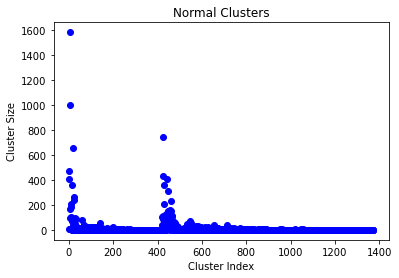

In [285]:
#  plot graph to show cluster index vs cluster size of normal clusters

for i in range(0, len(normal_clusters)):
    plt.scatter(i, len(normal_clusters[i]), color='blue')

plt.title('Normal Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.show()


In [300]:
# save the clusters to file

saveFile( './normal_clusters_r_0.03.txt',normal_clusters)

In [260]:

#! covid clusters
r =  0.03
cluster = []
check = []
for i in range(0, len(covid_train_vectors)-1):
    cluster = []
    if covid_train_vectors[i] not in check:
        cluster.append(covid_train_vectors[i])
        check.append(covid_train_vectors[i])
    else:
        continue
    for j in range(i+1, len(covid_train_vectors)):
        if euclidean_distance(covid_train_vectors[i], covid_train_vectors[j]) <= r:
            if covid_train_vectors[j] not in check:
                cluster.append(covid_train_vectors[j])
                check.append(covid_train_vectors[j])

    covid_clusters.append(cluster) 

In [261]:

# print the clusters
sum=0
for i in range(0, len(covid_clusters)):
    print("Covid Cluster -", i+1, " : ", len(covid_clusters[i]))
    sum+=len(covid_clusters[i])
print("Total number of vectors: ", sum)



Covid Cluster - 1  :  3
Covid Cluster - 2  :  58
Covid Cluster - 3  :  18
Covid Cluster - 4  :  11
Covid Cluster - 5  :  25
Covid Cluster - 6  :  51
Covid Cluster - 7  :  68
Covid Cluster - 8  :  9
Covid Cluster - 9  :  35
Covid Cluster - 10  :  130
Covid Cluster - 11  :  30
Covid Cluster - 12  :  7
Covid Cluster - 13  :  159
Covid Cluster - 14  :  1
Covid Cluster - 15  :  2
Covid Cluster - 16  :  28
Covid Cluster - 17  :  1
Covid Cluster - 18  :  1
Covid Cluster - 19  :  28
Covid Cluster - 20  :  89
Covid Cluster - 21  :  1
Covid Cluster - 22  :  20
Covid Cluster - 23  :  24
Covid Cluster - 24  :  8
Covid Cluster - 25  :  1
Covid Cluster - 26  :  46
Covid Cluster - 27  :  3
Covid Cluster - 28  :  1
Covid Cluster - 29  :  1
Covid Cluster - 30  :  12
Covid Cluster - 31  :  17
Covid Cluster - 32  :  2
Covid Cluster - 33  :  2
Covid Cluster - 34  :  18
Covid Cluster - 35  :  2
Covid Cluster - 36  :  47
Covid Cluster - 37  :  36
Covid Cluster - 38  :  17
Covid Cluster - 39  :  14
Covid Clu

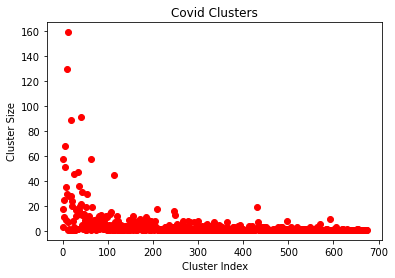

In [262]:
# plot graph to show cluster index vs cluster size of covid clusters

for i in range(0, len(covid_clusters)):
    plt.scatter(i, len(covid_clusters[i]), color='red')

plt.title('Covid Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.show()



In [301]:
# save the clusters to file

saveFile( './covid_clusters_r_0.03.txt',covid_clusters)

In [286]:

#! pneumonia clusters
r = 0.026
cluster = []
check = []
for i in range(0, len(pneumonia_train_vectors)-1):
    cluster = []
    if pneumonia_train_vectors[i] not in check:
        cluster.append(pneumonia_train_vectors[i])
        check.append(pneumonia_train_vectors[i])
    else:
        continue
    for j in range(i+1, len(pneumonia_train_vectors)):
        if euclidean_distance(pneumonia_train_vectors[i], pneumonia_train_vectors[j]) <= r:
            if pneumonia_train_vectors[j] not in check:
                cluster.append(pneumonia_train_vectors[j])
                check.append(pneumonia_train_vectors[j])

    pneumonia_clusters.append(cluster)
    

In [287]:

# print the clusters
sum=0
for i in range(0, len(pneumonia_clusters)):
    print("Pneumonia Cluster -", i+1, " : ", len(pneumonia_clusters[i]))
    sum+=len(pneumonia_clusters[i])
print("Total number of vectors: ", sum)

Pneumonia Cluster - 1  :  69
Pneumonia Cluster - 2  :  46
Pneumonia Cluster - 3  :  76
Pneumonia Cluster - 4  :  31
Pneumonia Cluster - 5  :  26
Pneumonia Cluster - 6  :  16
Pneumonia Cluster - 7  :  14
Pneumonia Cluster - 8  :  58
Pneumonia Cluster - 9  :  7
Pneumonia Cluster - 10  :  3
Pneumonia Cluster - 11  :  4
Pneumonia Cluster - 12  :  11
Pneumonia Cluster - 13  :  11
Pneumonia Cluster - 14  :  20
Pneumonia Cluster - 15  :  41
Pneumonia Cluster - 16  :  3
Pneumonia Cluster - 17  :  4
Pneumonia Cluster - 18  :  9
Pneumonia Cluster - 19  :  26
Pneumonia Cluster - 20  :  12
Pneumonia Cluster - 21  :  2
Pneumonia Cluster - 22  :  2
Pneumonia Cluster - 23  :  12
Pneumonia Cluster - 24  :  7
Pneumonia Cluster - 25  :  1
Pneumonia Cluster - 26  :  1
Pneumonia Cluster - 27  :  2
Pneumonia Cluster - 28  :  14
Pneumonia Cluster - 29  :  4
Pneumonia Cluster - 30  :  1
Pneumonia Cluster - 31  :  1
Pneumonia Cluster - 32  :  4
Pneumonia Cluster - 33  :  14
Pneumonia Cluster - 34  :  1
Pneumo

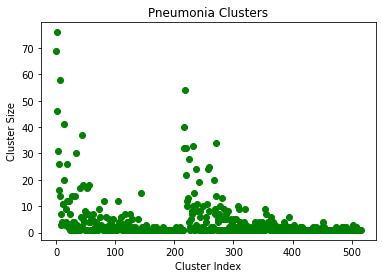

In [288]:

# plot graph to show cluster index vs cluster size of pneumonia clusters

for i in range(0, len(pneumonia_clusters)):
    plt.scatter(i, len(pneumonia_clusters[i]), color='green')

plt.title('Pneumonia Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.show()

In [302]:
# save the clusters to file

saveFile( './pneumonia_clusters_r_0.026.txt',pneumonia_clusters)

### Averaging the vectors

In [303]:
# get the average of each sub cluster

normal_prototypes = []
for i in range(0, len(normal_clusters)):
    normal_prototypes.append(np.mean(normal_clusters[i], axis=0))

# print the normal_prototypes
print("No. of Normal prototypes: ", len(normal_prototypes))

No. of Normal prototypes:  1374


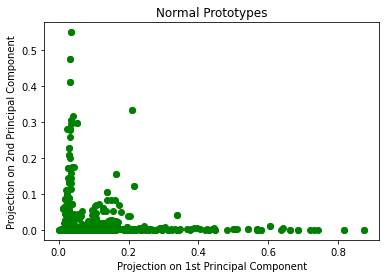

In [304]:
# plot the projections of normal prototypes in 2D space

for i in range(0, len(normal_prototypes)):
    plt.scatter(normal_prototypes[i][0], normal_prototypes[i][1], color='green')

plt.title('Normal Prototypes')
plt.xlabel('Projection on 1st Principal Component')
plt.ylabel('Projection on 2nd Principal Component')
plt.show()

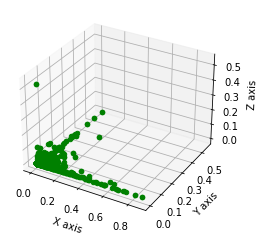

In [305]:
# plot the projections of normal prototypes in 3D space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(normal_prototypes)):
    ax.scatter(normal_prototypes[i][0], normal_prototypes[i][1], normal_prototypes[i][2], color='green')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [306]:
# save the normal prototypes to file

saveFile( './normal_prototypes_r_0.03.txt',normal_prototypes)

In [307]:


covid_prototypes = []
for i in range(0, len(covid_clusters)):
    covid_prototypes.append(np.mean(covid_clusters[i], axis=0))

# print the covid_prototypes
print("No. of Covid prototypes: ", len(covid_prototypes))



No. of Covid prototypes:  675


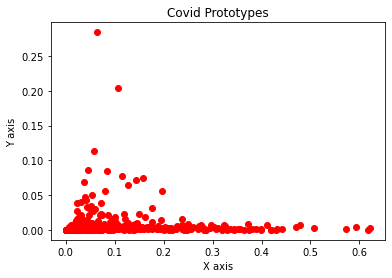

In [272]:
# plot the projections of covid prototypes in 2D space

for i in range(0, len(covid_prototypes)):
    plt.scatter(covid_prototypes[i][0], covid_prototypes[i][1], color='red')

plt.title('Covid Prototypes')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


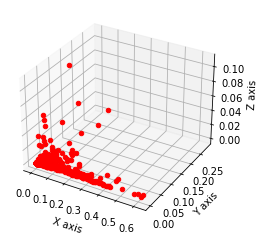

In [273]:
# plot the projections of covid prototypes in 3D space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(covid_prototypes)):
    ax.scatter(covid_prototypes[i][0], covid_prototypes[i][1], covid_prototypes[i][2], color='red')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


In [308]:
# save the covid prototypes to file

saveFile( './covid_prototypes_r_0.03.txt',covid_prototypes)

In [309]:

pneumonia_prototypes = []
for i in range(0, len(pneumonia_clusters)):
    pneumonia_prototypes.append(np.mean(pneumonia_clusters[i], axis=0))

# print the pneumonia_prototypes
print("No. of Pneumonia prototypes: ", len(pneumonia_prototypes))

No. of Pneumonia prototypes:  516


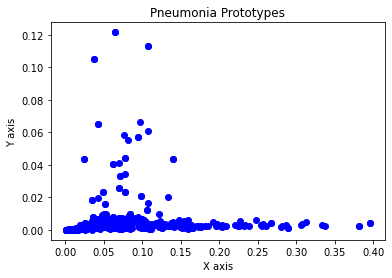

In [310]:
# plot the projections of pneumonia prototypes in 2D space

for i in range(0, len(pneumonia_prototypes)):
    plt.scatter(pneumonia_prototypes[i][0], pneumonia_prototypes[i][1], color='blue')

plt.title('Pneumonia Prototypes')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

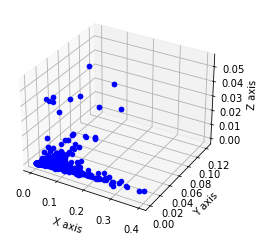

In [295]:
# plot the projections of pneumonia prototypes in 3D space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(pneumonia_prototypes)):
    ax.scatter(pneumonia_prototypes[i][0], pneumonia_prototypes[i][1], pneumonia_prototypes[i][2], color='blue')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


In [311]:
# save the pneumonia prototypes to file

saveFile( './pneumonia_prototypes_r_0.026.txt',pneumonia_prototypes)

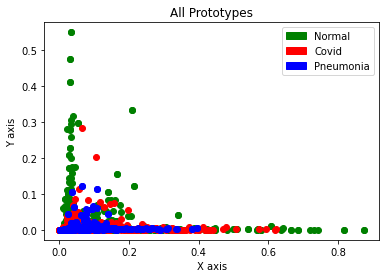

In [312]:
# all prototypes in 2D space

for i in range(0, len(normal_prototypes)):
    plt.scatter(normal_prototypes[i][0], normal_prototypes[i][1], color='green')

for i in range(0, len(covid_prototypes)):
    plt.scatter(covid_prototypes[i][0], covid_prototypes[i][1], color='red')

for i in range(0, len(pneumonia_prototypes)):
    plt.scatter(pneumonia_prototypes[i][0], pneumonia_prototypes[i][1], color='blue')

plt.title('All Prototypes')
plt.xlabel('X axis')
plt.ylabel('Y axis')

green_patch = mpatches.Patch(color='green', label='Normal')
red_patch = mpatches.Patch(color='red', label='Covid')
blue_patch = mpatches.Patch(color='blue', label='Pneumonia')
plt.legend(handles=[green_patch, red_patch, blue_patch])


plt.show()



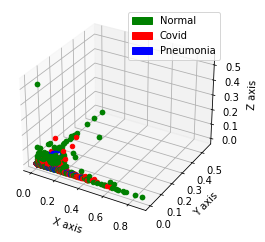

In [313]:
# all prototypes in 3D space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(normal_prototypes)):
    ax.scatter(normal_prototypes[i][0], normal_prototypes[i][1], normal_prototypes[i][2], color='green')

for i in range(0, len(covid_prototypes)):
    ax.scatter(covid_prototypes[i][0], covid_prototypes[i][1], covid_prototypes[i][2], color='red')

for i in range(0, len(pneumonia_prototypes)):
    ax.scatter(pneumonia_prototypes[i][0], pneumonia_prototypes[i][1], pneumonia_prototypes[i][2], color='blue')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

green_patch = mpatches.Patch(color='green', label='Normal')
red_patch = mpatches.Patch(color='red', label='Covid')
blue_patch = mpatches.Patch(color='blue', label='Pneumonia')

plt.legend(handles=[green_patch, red_patch, blue_patch])

plt.show()



In [314]:
test_vector = covid_test_vectors[21]

covid_prototype_index, covid_prototype_membership = getMaximumMembership(test_vector, covid_prototypes, 1)
normal_prototype_index, normal_prototype_membership = getMaximumMembership(test_vector, normal_prototypes, 1)
pneumonia_prototype_index, pneumonia_prototype_membership = getMaximumMembership(test_vector, pneumonia_prototypes, 1)

print("\n Class Covid =>","\tPrototype Index: ", covid_prototype_index, "\tPrototype Membership: ", covid_prototype_membership,"\tPercentage: ", covid_prototype_membership*100)
print("\n Class Normal =>","\tPrototype Index: ", normal_prototype_index, "\tPrototype Membership: ", normal_prototype_membership,"\tPercentage: ", normal_prototype_membership*100)
print("\n Class Pneumonia =>","\tPrototype Index: ", pneumonia_prototype_index, "\tPrototype Membership: ", pneumonia_prototype_membership,"\tPercentage: ", pneumonia_prototype_membership*100)


 Class Covid => 	Prototype Index:  19 	Prototype Membership:  0.9903867627630554 	Percentage:  99.03867627630554

 Class Normal => 	Prototype Index:  424 	Prototype Membership:  0.9857358275495371 	Percentage:  98.57358275495372

 Class Pneumonia => 	Prototype Index:  70 	Prototype Membership:  0.9774934915208857 	Percentage:  97.74934915208857


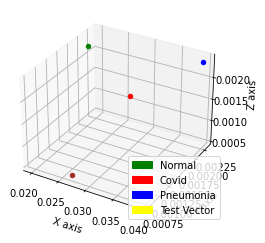

In [315]:
# plot test vector along with all prototypes in 3D space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(covid_prototypes[covid_prototype_index][0], covid_prototypes[covid_prototype_index][1], covid_prototypes[covid_prototype_index][2], color='red')
ax.scatter(normal_prototypes[normal_prototype_index][0], normal_prototypes[normal_prototype_index][1], normal_prototypes[normal_prototype_index][2], color='green')
ax.scatter(pneumonia_prototypes[pneumonia_prototype_index][0], pneumonia_prototypes[pneumonia_prototype_index][1], pneumonia_prototypes[pneumonia_prototype_index][2], color='blue')

ax.scatter(test_vector[0], test_vector[1], test_vector[2], color='brown')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

green_patch = mpatches.Patch(color='green', label='Normal')
red_patch = mpatches.Patch(color='red', label='Covid')
blue_patch = mpatches.Patch(color='blue', label='Pneumonia')
black_patch = mpatches.Patch(color='yellow', label='Test Vector')

plt.legend(handles=[green_patch, red_patch, blue_patch, black_patch])

plt.show()

In [316]:
covidCorrectlyClassified = 0
normalCorrectlyClassified = 0
pneumoniaCorrectlyClassified = 0
gamma = 0.1

for i in range(0, len(covid_test_vectors)):
    test_vector = covid_test_vectors[i]
    covid_prototype_index, covid_prototype_membership = getMaximumMembership(test_vector, covid_prototypes, gamma)
    normal_prototype_index, normal_prototype_membership = getMaximumMembership(test_vector, normal_prototypes, gamma)
    pneumonia_prototype_index, pneumonia_prototype_membership = getMaximumMembership(test_vector, pneumonia_prototypes, gamma)
    assigned_class = assignClass(covid_prototype_membership, normal_prototype_membership, pneumonia_prototype_membership)
    if assigned_class == "covid":
        covidCorrectlyClassified += 1

for i in range(0, len(normal_test_vectors)):
    test_vector = normal_test_vectors[i]
    covid_prototype_index, covid_prototype_membership = getMaximumMembership(test_vector, covid_prototypes, gamma)
    normal_prototype_index, normal_prototype_membership = getMaximumMembership(test_vector, normal_prototypes, gamma)
    pneumonia_prototype_index, pneumonia_prototype_membership = getMaximumMembership(test_vector, pneumonia_prototypes, gamma)
    assigned_class = assignClass(covid_prototype_membership, normal_prototype_membership, pneumonia_prototype_membership)
    if assigned_class == "normal":
        normalCorrectlyClassified += 1

for i in range(0, len(pneumonia_test_vectors)):
    test_vector = pneumonia_test_vectors[i]
    covid_prototype_index, covid_prototype_membership = getMaximumMembership(test_vector, covid_prototypes, gamma)
    normal_prototype_index, normal_prototype_membership = getMaximumMembership(test_vector, normal_prototypes, gamma)
    pneumonia_prototype_index, pneumonia_prototype_membership = getMaximumMembership(test_vector, pneumonia_prototypes, gamma)
    assigned_class = assignClass(covid_prototype_membership, normal_prototype_membership, pneumonia_prototype_membership)
    if assigned_class == "pneumonia":
        pneumoniaCorrectlyClassified += 1


In [317]:
covidAccuracy = accuracy(len(covid_test_vectors), covidCorrectlyClassified)
normalAccuracy = accuracy(len(normal_test_vectors), normalCorrectlyClassified)
pneumoniaAccuracy = accuracy(
    len(pneumonia_test_vectors), pneumoniaCorrectlyClassified)


totalTestImages = len(pneumonia_test_vectors) + \
    len(covid_test_vectors) + len(normal_test_vectors)
correctlyClassifiedImages = pneumoniaCorrectlyClassified + \
    covidCorrectlyClassified + normalCorrectlyClassified

accuracyOfModel = accuracy(totalTestImages, correctlyClassifiedImages)

print("\nNormal correctly classified:\t\t", normalCorrectlyClassified,
      "/", len(normal_test_vectors), '\nNormal Accuracy:\t\t\t', normalAccuracy)
print("\nCovid correctly classified:\t\t", covidCorrectlyClassified,
      "/", len(covid_test_vectors), '\nCovid Accuracy:\t\t\t\t', covidAccuracy)
print("\nPneumonia correctly classified:\t\t", pneumoniaCorrectlyClassified,
      "/", len(pneumonia_test_vectors), '\nPneumonia Accuracy:\t\t\t', pneumoniaAccuracy)

print("\n\nAccuracy=>\t", accuracyOfModel)



Normal correctly classified:		 1736 / 2039 
Normal Accuracy:			 85.13977439921531

Covid correctly classified:		 448 / 724 
Covid Accuracy:				 61.87845303867403

Pneumonia correctly classified:		 185 / 269 
Pneumonia Accuracy:			 68.77323420074349


Accuracy=>	 78.13324538258574
